In [1]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas import get_dummies
from numpy import mean
from numpy import std
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# Load dataset
filename = 'bank-additional.csv'
#names = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome", "emp.var.rate","cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed", "y"]
dataset = read_csv(filename , delimiter=';')


In [3]:
# head
set_option('display.width', 100) 
dataset.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [4]:
# shape
print(dataset.shape)

(4119, 21)


In [5]:
# types
#set_option('display.max_rows', 500)
#print(dataset.dtypes)

In [6]:
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())


            age  duration  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
count  4119.000  4119.000  4119.000  4119.000  4119.000      4119.000        4119.000   
mean     40.114   256.788     2.537   960.422     0.190         0.085          93.580   
std      10.313   254.704     2.568   191.923     0.542         1.563           0.579   
min      18.000     0.000     1.000     0.000     0.000        -3.400          92.201   
25%      32.000   103.000     1.000   999.000     0.000        -1.800          93.075   
50%      38.000   181.000     2.000   999.000     0.000         1.100          93.749   
75%      47.000   317.000     3.000   999.000     0.000         1.400          93.994   
max      88.000  3643.000    35.000   999.000     6.000         1.400          94.767   

       cons.conf.idx  euribor3m  nr.employed  
count       4119.000   4119.000     4119.000  
mean         -40.499      3.621     5166.482  
std            4.595      1.734       73.668  
min       

In [7]:
# class distribution
print(dataset.groupby('y').size())

y
no     3668
yes     451
dtype: int64


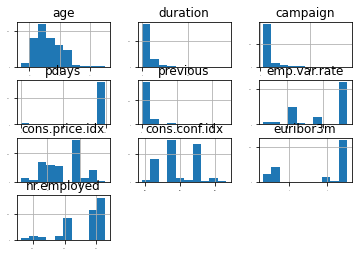

In [8]:
# histogram
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

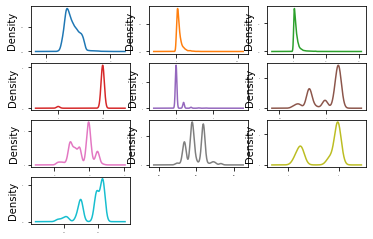

In [9]:
# density 
dataset.plot(kind='density', subplots=True, layout=(4,3), sharex=False, legend=False,
fontsize=1)
pyplot.show()

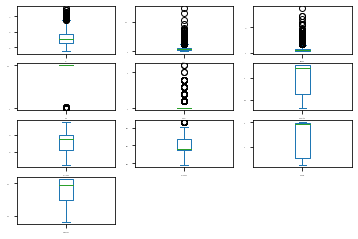

In [10]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False,
fontsize=1)
pyplot.show()

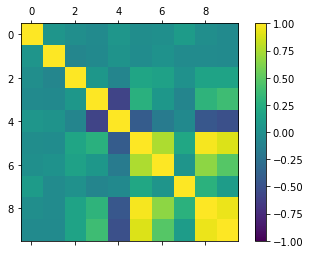

In [11]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax=ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()


In [12]:
# Check if there are any missing values in the dataset.
dataset.isnull().sum().sum()

0

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [14]:
#dataset["job"].unique()

In [15]:
#one_hot = get_dummies(dataset["job"], prefix="job", drop_first=False)
#one_hot

In [16]:
#dataset["marital"].unique()

In [17]:
#dataset["education"].unique()

In [18]:
# Load the dataset again since we want to split inout and output and give column just number instead of name
#dataset = read_csv(filename, sep=';', skiprows=[0],header=None)
#print(dataset.tail())

# Label encoder
encoder = LabelEncoder()
dataset['job'] = encoder.fit_transform(dataset['job'])
dataset['marital'] = encoder.fit_transform(dataset['marital'])
dataset['education'] = encoder.fit_transform(dataset['education'])
dataset['default'] = encoder.fit_transform(dataset['default'])
dataset['housing'] = encoder.fit_transform(dataset['housing'])
dataset['loan'] = encoder.fit_transform(dataset['loan'])
dataset['contact'] = encoder.fit_transform(dataset['contact'])
dataset['month'] = encoder.fit_transform(dataset['month'])
dataset['day_of_week'] = encoder.fit_transform(dataset['day_of_week'])
dataset['poutcome'] = encoder.fit_transform(dataset['poutcome'])
#dataset['y'] = encoder.fit_transform(dataset['y'])

dataset.head()

# split into inputs and outputs
# last_ix = len(dataset.columns) - 1
# #print(last_ix)
# X, y = dataset.drop(last_ix, axis=1), dataset[last_ix]
# #print(X.tail())
# #print(y.tail())
# print(X.shape, y.shape)
# # determine categorical and numerical features
# #numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
# categorical_ix = X.select_dtypes(include=['object', 'bool']).columns
# print(categorical_ix)
# # define the data preparation for the columns
# t = [('cat', OneHotEncoder(), [1,2])]
# col_transform = ColumnTransformer(transformers=t)
# #print(t)
# tr_X =col_transform.fit_transform(X)
# print(tr_X )
# # define the model
# model =  LinearDiscriminantAnalysis()
# # define the data preparation and modeling pipeline
# #pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])
# # define the model cross-validation configuration
# kfold = KFold(n_splits=10, shuffle=True, random_state=1)
# evaluate the pipeline using cross validation and calculate MAE
#cv_results = cross_val_score(tr_X, y, cv=kfold, scoring='accuracy')
# summarize the model performance
#print("Accuracy: %.3f (%.3f)" % (cv_results.mean(), cv_results.std()))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,no
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,no
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,no
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,no


In [19]:
#dataset['housing_val'] = dataset['housing'].apply(lambda row: 1 if row == 'yes' else 0)
#dataset[['housing','housing_val']].head(10)

In [20]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:20]
Y = array[:,20]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation= train_test_split(X, Y,test_size=validation_size, random_state=seed)
#print(len(Y_train),len(Y_validation))
#print(len(X_train), len(X_validation))

In [21]:
# Test options and evaluation metric
num_folds = 10
scoring = 'accuracy'

In [22]:
 # Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))        
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [23]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)  
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" %(name, cv_results.mean(),cv_results.std())
  print(msg)

/home/mahmud/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mahmud/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

LR: 0.912607 (0.013879)
LDA: 0.911696 (0.013520)
KNN: 0.903199 (0.015717)
CART: 0.883172 (0.015421)
NB: 0.845849 (0.023755)
SVM: 0.900166 (0.017744)


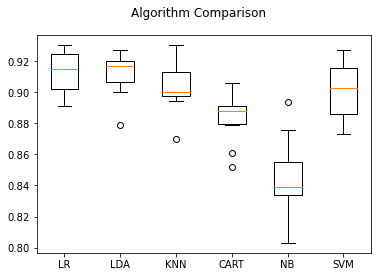

In [24]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [25]:
# grid searching key hyperparametres for logistic regression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold,scoring=scoring)
grid_result =grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

/home/mahmud/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mahmud/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mahmud/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/home/mahmud/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mahmud/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line s

Best: 0.913821 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.912304 (0.013447) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.913820 (0.013510) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.913821 (0.015470) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.912607 (0.012916) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.912911 (0.013957) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.913821 (0.015470) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.912608 (0.014328) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.912607 (0.013879) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.913820 (0.014048) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.913821 (0.015226) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.912608 (0.014453) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.912912 (0.015031) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.912001 (0.014529) wit

In [26]:
# tune hyperparametres for Linear Discriminant Analysis
model = LinearDiscriminantAnalysis()
solvers = ['svd', 'lsqr', 'eigen']
# define grid search
param_grid = dict(solver=solvers)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold,scoring=scoring)
grid_result =grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

Best: 0.911696 using {'solver': 'svd'}
0.911696 (0.013520) with: {'solver': 'svd'}
0.911696 (0.013520) with: {'solver': 'lsqr'}
0.911696 (0.013520) with: {'solver': 'eigen'}


In [33]:
# Tune  KNN
model = KNeighborsClassifier()
neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
param_grid = dict(n_neighbors=neighbors)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold,scoring=scoring)
grid_result =grid.fit(X_train, Y_train)
print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" %(mean, stdev, param)) 

Best: 0.912302 using {'n_neighbors': 23}
0.884380 (0.013589) with: {'n_neighbors': 1}
0.898345 (0.017822) with: {'n_neighbors': 3}
0.903199 (0.015717) with: {'n_neighbors': 5}
0.903806 (0.018395) with: {'n_neighbors': 7}
0.904410 (0.014759) with: {'n_neighbors': 9}
0.909569 (0.010237) with: {'n_neighbors': 11}
0.905931 (0.011410) with: {'n_neighbors': 13}
0.906227 (0.009187) with: {'n_neighbors': 15}
0.909267 (0.013671) with: {'n_neighbors': 17}
0.909263 (0.011572) with: {'n_neighbors': 19}
0.911693 (0.012562) with: {'n_neighbors': 21}
0.912302 (0.014776) with: {'n_neighbors': 23}
0.909873 (0.015180) with: {'n_neighbors': 25}
0.911389 (0.013710) with: {'n_neighbors': 27}
0.910780 (0.014530) with: {'n_neighbors': 29}


In [34]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train,cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.909564 (0.010279)
GBM: 0.913516 (0.017918)
RF: 0.911085 (0.014450)
ET: 0.901681 (0.023696)


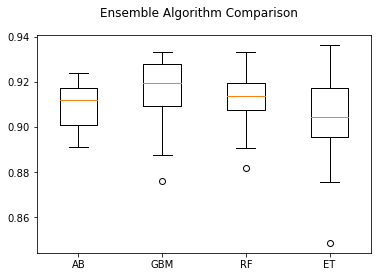

In [35]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [40]:
# Tune AB
model = AdaBoostClassifier(random_state=seed)
param_grid = dict(n_estimators=numpy.array([10,20,30,40,50,100,150,200,250,300,350,400])) #started from 10 since just to check below 50 might have better result
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.911690 using {'n_estimators': 30}
0.902892 (0.011512) with: {'n_estimators': 10}
0.908656 (0.012047) with: {'n_estimators': 20}
0.911690 (0.012503) with: {'n_estimators': 30}
0.908351 (0.010958) with: {'n_estimators': 40}
0.909564 (0.010279) with: {'n_estimators': 50}
0.908956 (0.010392) with: {'n_estimators': 100}
0.907742 (0.013290) with: {'n_estimators': 150}
0.908961 (0.014184) with: {'n_estimators': 200}
0.906835 (0.012539) with: {'n_estimators': 250}
0.904105 (0.012829) with: {'n_estimators': 300}
0.904102 (0.011960) with: {'n_estimators': 350}
0.902282 (0.012073) with: {'n_estimators': 400}


In [39]:
# Tune  GBM
model = GradientBoostingClassifier(random_state=seed)
#started from 10 since  just to check below 50 might have better result
param_grid = dict(n_estimators=numpy.array([10,20,30,40,50,100,150,200,250,300,350,400])) 
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.917152 using {'n_estimators': 40}
0.904718 (0.017103) with: {'n_estimators': 10}
0.911394 (0.016931) with: {'n_estimators': 20}
0.916549 (0.015017) with: {'n_estimators': 30}
0.917152 (0.015452) with: {'n_estimators': 40}
0.917152 (0.014532) with: {'n_estimators': 50}
0.912604 (0.017110) with: {'n_estimators': 100}
0.908050 (0.015189) with: {'n_estimators': 150}
0.907747 (0.016581) with: {'n_estimators': 200}
0.905922 (0.017184) with: {'n_estimators': 250}
0.904709 (0.015917) with: {'n_estimators': 300}
0.905926 (0.014622) with: {'n_estimators': 350}
0.905012 (0.012983) with: {'n_estimators': 400}


In [41]:
# Tune RF
model = RandomForestClassifier(random_state=seed)
#started from 10 since  just to check below 50 might have better result
param_grid = dict(n_estimators=numpy.array([10,20,30,40,50,100,150,200,250,300,350,400])) 
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.911696 using {'n_estimators': 350}
0.901985 (0.016105) with: {'n_estimators': 10}
0.906843 (0.016428) with: {'n_estimators': 20}
0.907140 (0.014882) with: {'n_estimators': 30}
0.908661 (0.013855) with: {'n_estimators': 40}
0.908357 (0.013815) with: {'n_estimators': 50}
0.907145 (0.013153) with: {'n_estimators': 100}
0.908966 (0.012784) with: {'n_estimators': 150}
0.909877 (0.013753) with: {'n_estimators': 200}
0.911088 (0.013224) with: {'n_estimators': 250}
0.911090 (0.014217) with: {'n_estimators': 300}
0.911696 (0.015426) with: {'n_estimators': 350}
0.910482 (0.013573) with: {'n_estimators': 400}


In [42]:
# Tune ET
model = ExtraTreesClassifier(random_state=seed)
param_grid = dict(n_estimators=numpy.array([10,20,30,40,50,100,150,200,250,300,350,400])) #started from 10 since  just to check below 50 might have better result
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.904417 using {'n_estimators': 20}
0.900469 (0.022312) with: {'n_estimators': 10}
0.904417 (0.018030) with: {'n_estimators': 20}
0.901985 (0.016438) with: {'n_estimators': 30}
0.901379 (0.021053) with: {'n_estimators': 40}
0.901378 (0.023025) with: {'n_estimators': 50}
0.899860 (0.024139) with: {'n_estimators': 100}
0.902287 (0.024555) with: {'n_estimators': 150}
0.902891 (0.023265) with: {'n_estimators': 200}
0.901372 (0.022962) with: {'n_estimators': 250}
0.903193 (0.021990) with: {'n_estimators': 300}
0.904409 (0.022712) with: {'n_estimators': 350}
0.904409 (0.021972) with: {'n_estimators': 400}


In [49]:
# prepare the model
model =  GradientBoostingClassifier(n_estimators=50, random_state=seed) 
""" n_estimators=50 chosen since accuracy see above for 
tuning hypermeter 40 and 50 has same mean (although 40 chosen here) but 50 has less std """
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
predictions = model.predict(X_validation)
#print(predictions)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9150485436893204
[[715  20]
 [ 50  39]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95       735
         yes       0.66      0.44      0.53        89

    accuracy                           0.92       824
   macro avg       0.80      0.71      0.74       824
weighted avg       0.91      0.92      0.91       824

